## CSCI3320 Assignment 1 Code ##

Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

Q2

In [2]:
def calculate_hoeffding_sample_size(bound, tolerance):
    return math.ceil((1 / (2 * (tolerance ** 2))) * math.log(2 / bound))

In [3]:
# (a)
tolerance = 0.1
bound = 0.05
print(calculate_hoeffding_sample_size(bound, tolerance))

# (b)
tolerance = 0.02
bound = 0.05
print(calculate_hoeffding_sample_size(bound, tolerance))

# (c)
tolerance = 0.003
bound = 0.05
print(calculate_hoeffding_sample_size(bound, tolerance))

185
4612
204938


Q3

In [4]:
def calculate_hoeffding_bound(v, mu, sample_size):
    tolerance = mu - v
    return 2 * (math.e ** (-2 * (tolerance ** 2) * sample_size))

In [5]:
v = 0.1
mu = 0.95
sample_size = 20
print(calculate_hoeffding_bound(v, mu, sample_size))

5.622370597578098e-13


Q4

In [6]:
def generate_dataset(size, dim):
    X = np.random.uniform(-1, 1, (size, dim))
    w = np.random.uniform(-1, 1, dim)
    y = np.sign(np.dot(X, w))
    return X, y, w

def calculate_accuracy(X, y, w):
    num_samples, num_features = X.shape
    predictions = np.sign(np.dot(X, w))
    accuracy = np.sum(predictions == y) / num_samples
    return accuracy

def iteration_perceptron(X, y, show_progress=False):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)

    accuracy_history = []
    accuracy = calculate_accuracy(X, y, w)
    accuracy_history.append(accuracy)

    converged = False
    iteration_num = 0
    num_updates = 0
    while not converged:
        iteration_num += 1
        misclassified = 0
        if show_progress is True:
            print(f'=== Epoch [{iteration_num}] ===')
        for i in range(num_samples):
            if np.sign(np.dot(w, X[i, :])) != y[i]:
                w = w + y[i] * X[i, :]
                misclassified += 1
                accuracy = calculate_accuracy(X, y, w)
                accuracy_history.append(accuracy)
                if show_progress is True:
                    print(f'found miclassified samples {i}.')
        num_updates += misclassified
        if show_progress is True:    
            print(f'Total miclassified samples in Epoch [{iteration_num}]: {misclassified}')
        if misclassified == 0:
            converged = True

    return w, num_updates, accuracy_history

def plot_dataset(X, y, f=None, g=None):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='r', marker='o', label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='b', marker='x', label='Class -1')
    plt.xlabel('X')
    plt.ylabel('Y')
    if f is not None:
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
        y_vals = -(f[0] / f[1]) * x_vals
        plt.plot(x_vals, y_vals, color='b', linestyle='-', label='Target function f')
    if g is not None:
        x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
        y_vals = -(g[0] / g[1]) * x_vals
        plt.plot(x_vals, y_vals, color='g', linestyle='--', label='Final Hypothesis g')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.legend()
    plt.title('Perceptron Learning Algorithm')
    plt.show()

def plot_accuracy(accuracy_history):
    plt.plot(accuracy_history)
    plt.xlabel('Number of updates')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.show()

def measure_performance(N_values, d_values):
    performance = []

    for N in N_values:
        for d in d_values:
            X, y, f = generate_dataset(N, d)

            start_time = time.time()
            g, num_updates, accuracy_history = iteration_perceptron(X, y)
            end_time = time.time()

            accuracy = calculate_accuracy(X, y, g)
            running_time = end_time - start_time

            performance.append((N, d, accuracy, running_time, num_updates, accuracy_history))

    return performance

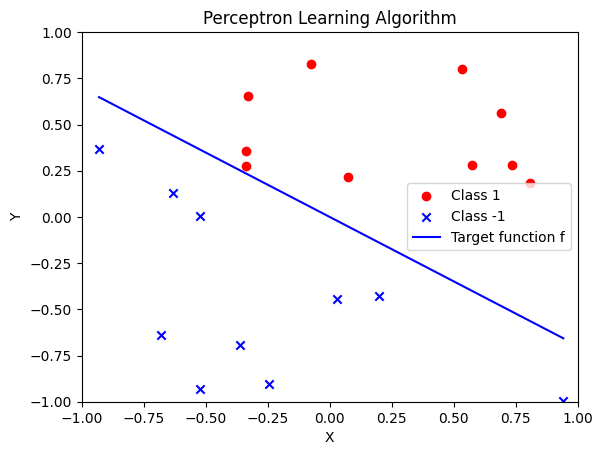

In [7]:
# (a)
X, y, f = generate_dataset(20, 2)
plot_dataset(X, y, f)

Number of update = 1


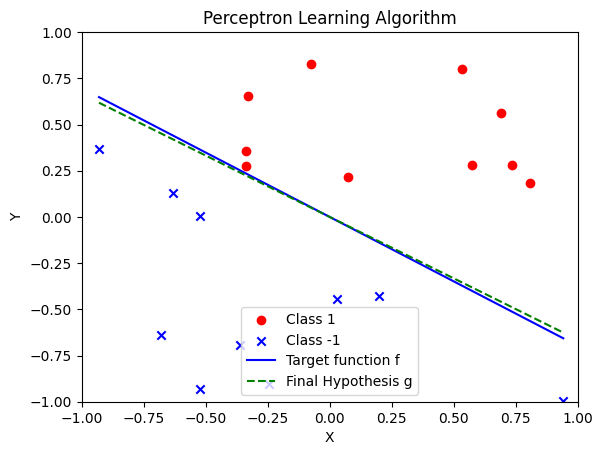

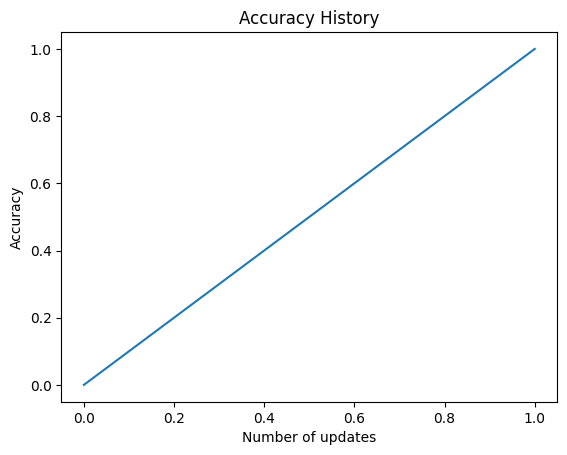

In [8]:
# (b)
g, num_updates, accuracy_history = iteration_perceptron(X, y)
print(f'Number of update = {num_updates}')
plot_dataset(X, y, f, g)
plot_accuracy(accuracy_history)

Number of update = 7


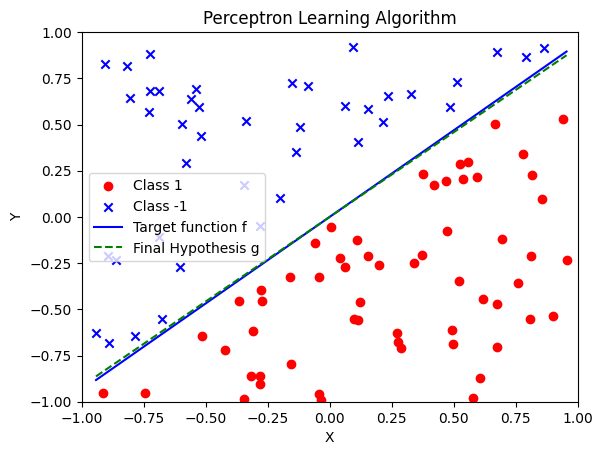

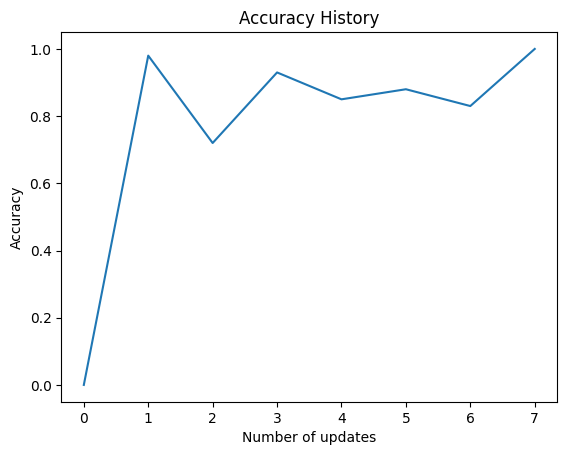

In [9]:
# (c)
X, y, f = generate_dataset(100, 2)
g, num_updates, accuracy_history = iteration_perceptron(X, y)
print(f'Number of update = {num_updates}')
plot_dataset(X, y, f, g)
plot_accuracy(accuracy_history)

Number of update = 127


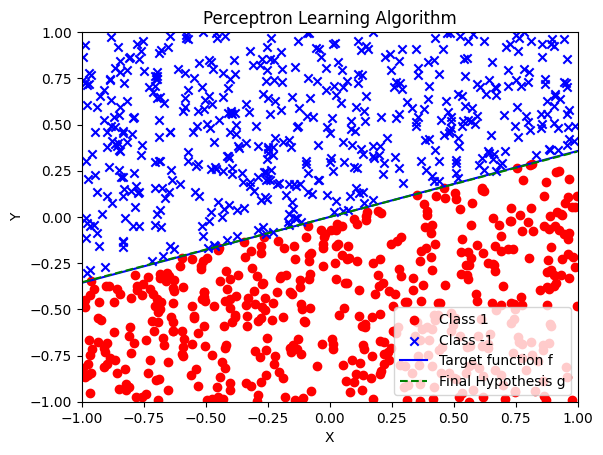

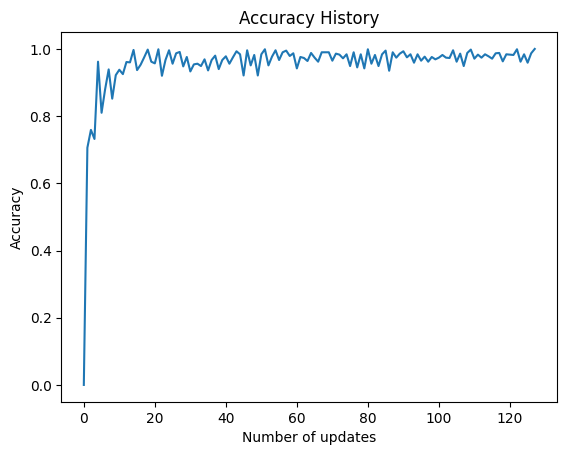

In [10]:
# (d)
X, y, f = generate_dataset(1000, 2)
g, num_updates, accuracy_history = iteration_perceptron(X, y)
print(f'Number of update = {num_updates}')
plot_dataset(X, y, f, g)
plot_accuracy(accuracy_history)

Number of update = 10513


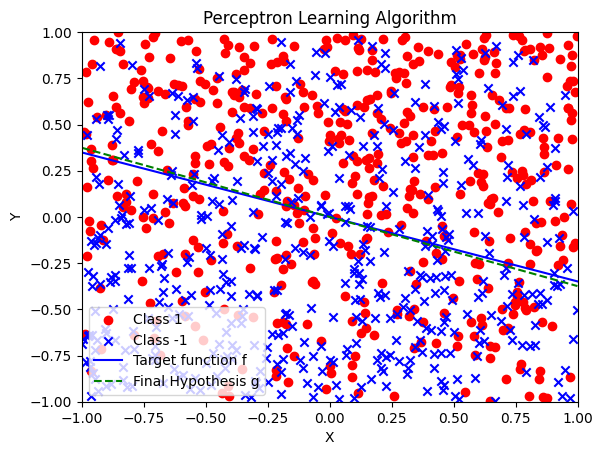

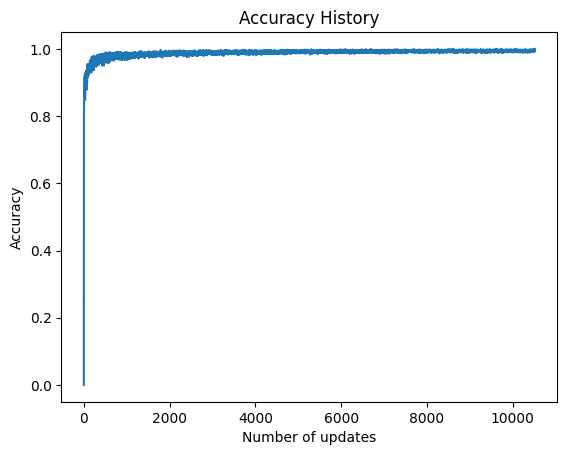

In [11]:
# (e)
X, y, f = generate_dataset(1000, 10)
g, num_updates, accuracy_history = iteration_perceptron(X, y)
print(f'Number of update = {num_updates}')
plot_dataset(X, y, f, g)
plot_accuracy(accuracy_history)

N=100, d=2: Final Accuracy=1.00, Running Time=0.0010 seconds, Number of updates=1


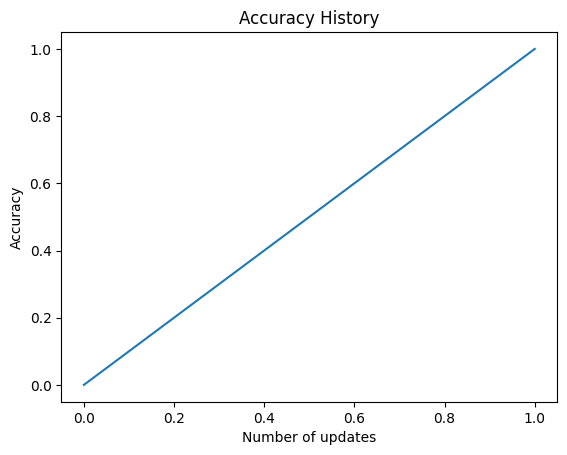

N=100, d=5: Final Accuracy=1.00, Running Time=0.0060 seconds, Number of updates=46


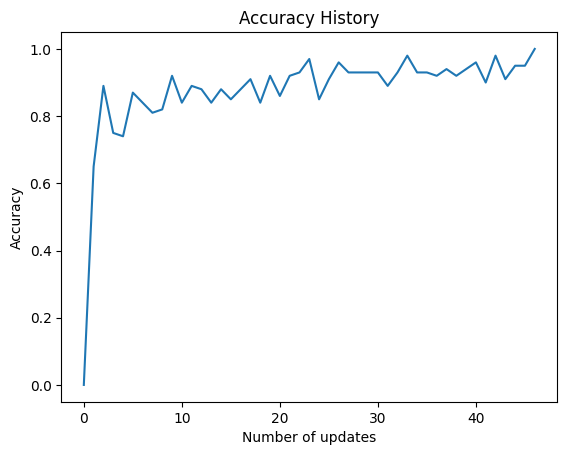

N=100, d=10: Final Accuracy=1.00, Running Time=0.0350 seconds, Number of updates=518


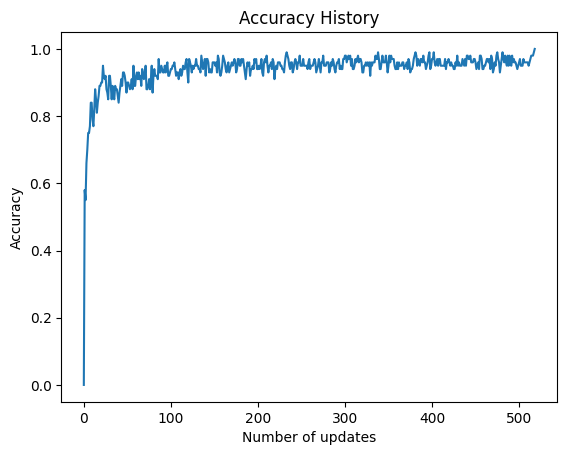

N=500, d=2: Final Accuracy=1.00, Running Time=0.0070 seconds, Number of updates=54


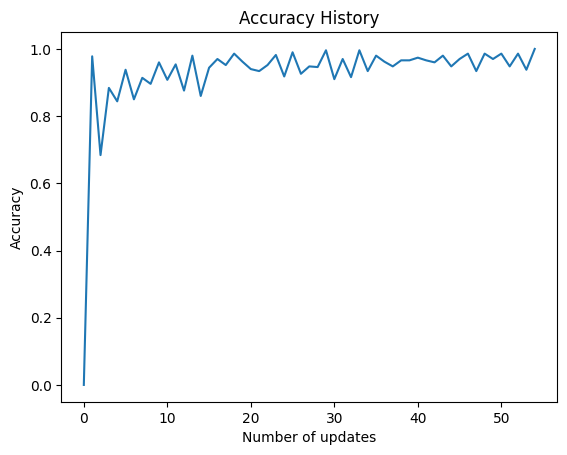

N=500, d=5: Final Accuracy=1.00, Running Time=0.1060 seconds, Number of updates=754


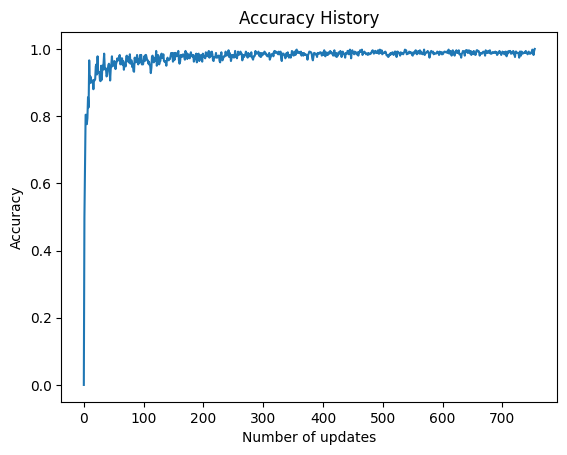

N=500, d=10: Final Accuracy=1.00, Running Time=0.0760 seconds, Number of updates=738


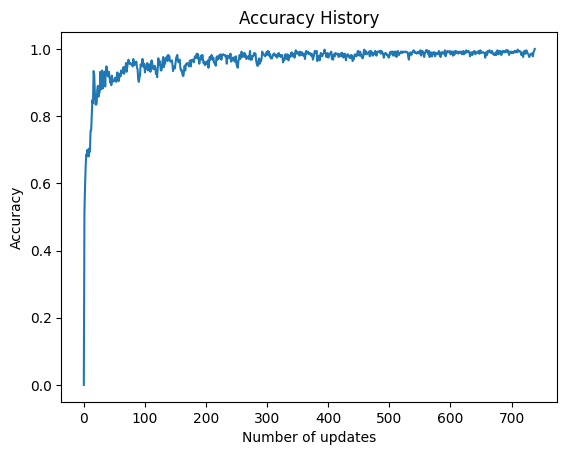

N=1000, d=2: Final Accuracy=1.00, Running Time=0.0110 seconds, Number of updates=93


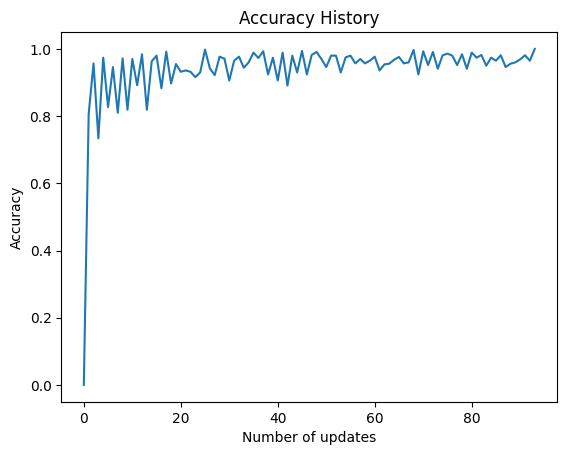

N=1000, d=5: Final Accuracy=1.00, Running Time=0.1540 seconds, Number of updates=1121


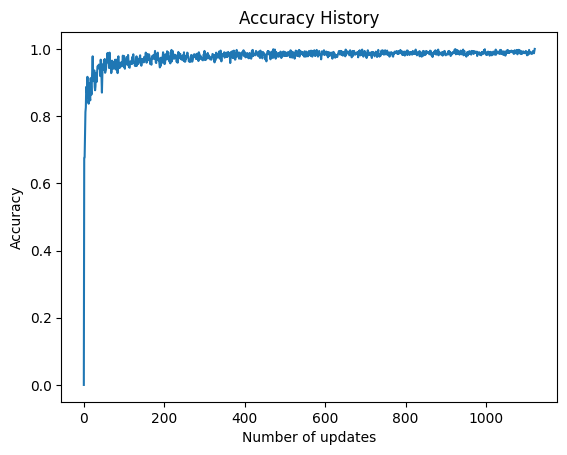

N=1000, d=10: Final Accuracy=1.00, Running Time=0.6458 seconds, Number of updates=2583


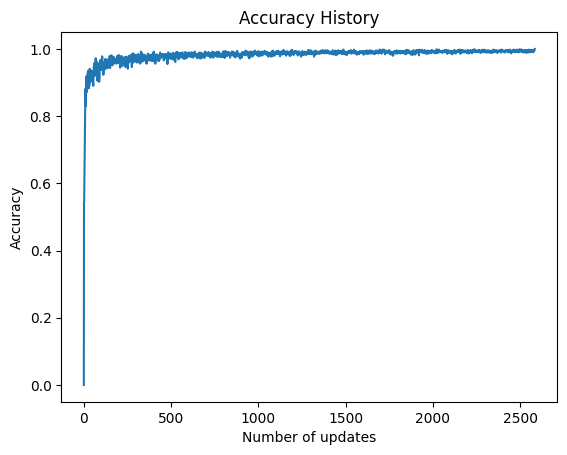

In [12]:
# (f)
N_values = [100, 500, 1000]
d_values = [2, 5, 10]
performance = measure_performance(N_values, d_values)
for result in performance:
    N, d, accuracy, running_time, num_updates, accuracy_history = result
    print(f"N={N}, d={d}: Final Accuracy={accuracy:.2f}, Running Time={running_time:.4f} seconds, Number of updates={num_updates}")
    plot_accuracy(accuracy_history)

Q5

In [13]:
def calculate_no_red_marbles_probability(mu, sample_size, num_samples):
    p = (1 - mu) ** sample_size
    return 1 - (1 - p) ** num_samples

In [14]:
# (a)
print("(a)")
sample_size = 10
num_samples = 1
mu = 0.05
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.6
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.9
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))

# (b)
print("(b)")
sample_size = 10
num_samples = 1000
mu = 0.05
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.6
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.9
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))

# (c)
print("(c)")
sample_size = 10
num_samples = 1000000
mu = 0.05
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.6
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))
mu = 0.9
print(calculate_no_red_marbles_probability(mu, sample_size, num_samples))

(a)
0.5987369392383787
0.00010485760000000788
1.000000082740371e-10
(b)
1.0
0.09955221269675618
1.0000000327803349e-07
(c)
1.0
1.0
9.999500844481979e-05
